### Trabalho de IA: Câncer de Mama

[Algum texto boladinho aqui...]

#### Importanto as bibliotecas

Primeiro vamos importar nossas bibliotecas.

In [115]:
import numpy as np
import pandas as pd

#### Carregando o dataset

Agora vamos carregar nosso dataset.

In [116]:
df = pd.read_excel("datasets/dataset.xlsx")

In [104]:
df.head()

,Age at diagnosis,Regional nodes positive (1988+),Total number of in situ/malignant tumors for patient,Radiation recode,Chemotherapy recode,Radiation sequence with surgery,ER Status Recode Breast Cancer (1990+),PR Status Recode Breast Cancer (1990+),CS tumor size (2004-2015),Derived HER2 Recode (2010+),Regional nodes examined (1988+),COD to site recode,Race recode,Sex,Vital status recode (study cutoff used),Diagnosis_year,Last_fu _year,interva_years,stutus_5_years
0,54,3,1,Beam radiation,Yes,Radiation after surgery,Negative,Negative,25,Positive,14,Alive,White,Female,Alive,2011,2016,5,Alive
1,59,3,1,Beam radiation,Yes,Radiation after surgery,Positive,Negative,36,Negative,19,Alive,White,Female,Alive,2011,2016,5,Alive
2,54,0,2,Beam radiation,No/Unknown,Radiation after surgery,Positive,Positive,6,Negative,5,Alive,White,Female,Alive,2010,2016,6,Alive
3,58,0,1,Beam radiation,No/Unknown,Radiation after surgery,Positive,Positive,1,Negative,1,Alive,White,Female,Alive,2010,2016,6,Alive
4,89,0,1,None/Unknown,No/Unknown,No radiation and/or cancer-directed surgery,Negative,Positive,17,Negative,1,Alive,White,Female,Alive,2011,2016,5,Alive


#### Limpeza e Análise Exploratória dos Dados

Vamos então limpar os dados e fazer algumas análises estatísticas neles.

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35349 entries, 0 to 35348
Data columns (total 19 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Age at diagnosis                                      35349 non-null  int64 
 1   Regional nodes positive (1988+)                       35349 non-null  int64 
 2   Total number of in situ/malignant tumors for patient  35349 non-null  int64 
 3   Radiation recode                                      35349 non-null  object
 4   Chemotherapy recode                                   35349 non-null  object
 5   Radiation sequence with surgery                       35349 non-null  object
 6   ER Status Recode Breast Cancer (1990+)                35349 non-null  object
 7   PR Status Recode Breast Cancer (1990+)                35349 non-null  object
 8   CS tumor size (2004-2015)                             35349 non-nu

Vamos primeiro renomear algumas colunas, dando um nome mais adequado.

In [106]:
df.columns = df.columns.str.strip()

df = df.rename({
    "Diagnosis_year": "Diagnosis year",
    "Last_fu _year": "Last year of contact for treatment",
    "interva_years": "Number of intervals the screening was done",
    "stutus_5_years": "Patient status after 5 year",
}, axis="columns")

Agora vamos analisar os dados faltantes no dataset.

In [107]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}\n")

Age at diagnosis: [54 59 58 89 45 72 71 57 51 76 52 82 68 65 44 43 48 69 46 37 96 41 64 53
 67 61 80 50 60 70 86 79 49 40 47 63 66 73 92 55 36 87 74 75 42 90 85 62
 83 26 56 38 35 77 32 33 28 78 84 81 39 27 88 29 95 34 30 94 93 91 99 97
 98 31 25 20 24 21 22 23 19  2 15 18]

Regional nodes positive (1988+): [ 3  0 98  4  1 95 10  2 11  5 39 13 15  9 21  6 19 14 16 12 52 23  7 97
 30 34  8 17 99 20 26 33 24 29 46 42 27 18 22 31 65 25 32 28 35 40 38 76
 36 37 41 48]

Total number of in situ/malignant tumors for patient: [1 2 3 4]

Radiation recode: ['Beam radiation' 'None/Unknown'
 'Radioactive implants (includes brachytherapy) (1988+)'
 'Radioisotopes (1988+)' 'Combination of beam with implants or isotopes'
 'Refused (1988+)']

Chemotherapy recode: ['Yes' 'No/Unknown']

Radiation sequence with surgery: ['Radiation after surgery' 'No radiation and/or cancer-directed surgery'
 'Radiation before and after surgery' 'Radiation prior to surgery'
 'Intraoperative radiation'
 'Intraoperative ra

Vamos eliminar as linhas que possuem dados faltantes. As variáveis "CS tumor size (2004-2015)" e "Regional node positive (1988+)" possuem valores $999$ e $99$, que são, respectivamente, os valores ausentes dessas variáveis. Vamos eliminar as linhas que possuem esses valores.

In [108]:
tumor_size_mask = (df["CS tumor size (2004-2015)"] != "999") & (df["CS tumor size (2004-2015)"] != "Blank(s)")
regional_nodes_mask = (df["Regional nodes positive (1988+)"] != 99)

df = df[tumor_size_mask & regional_nodes_mask]

Agora vamos criar a matrix de correlação desse dataframe para descobrir as variáveis altamente correlacionadas com a variável "Patient status after 5 years".

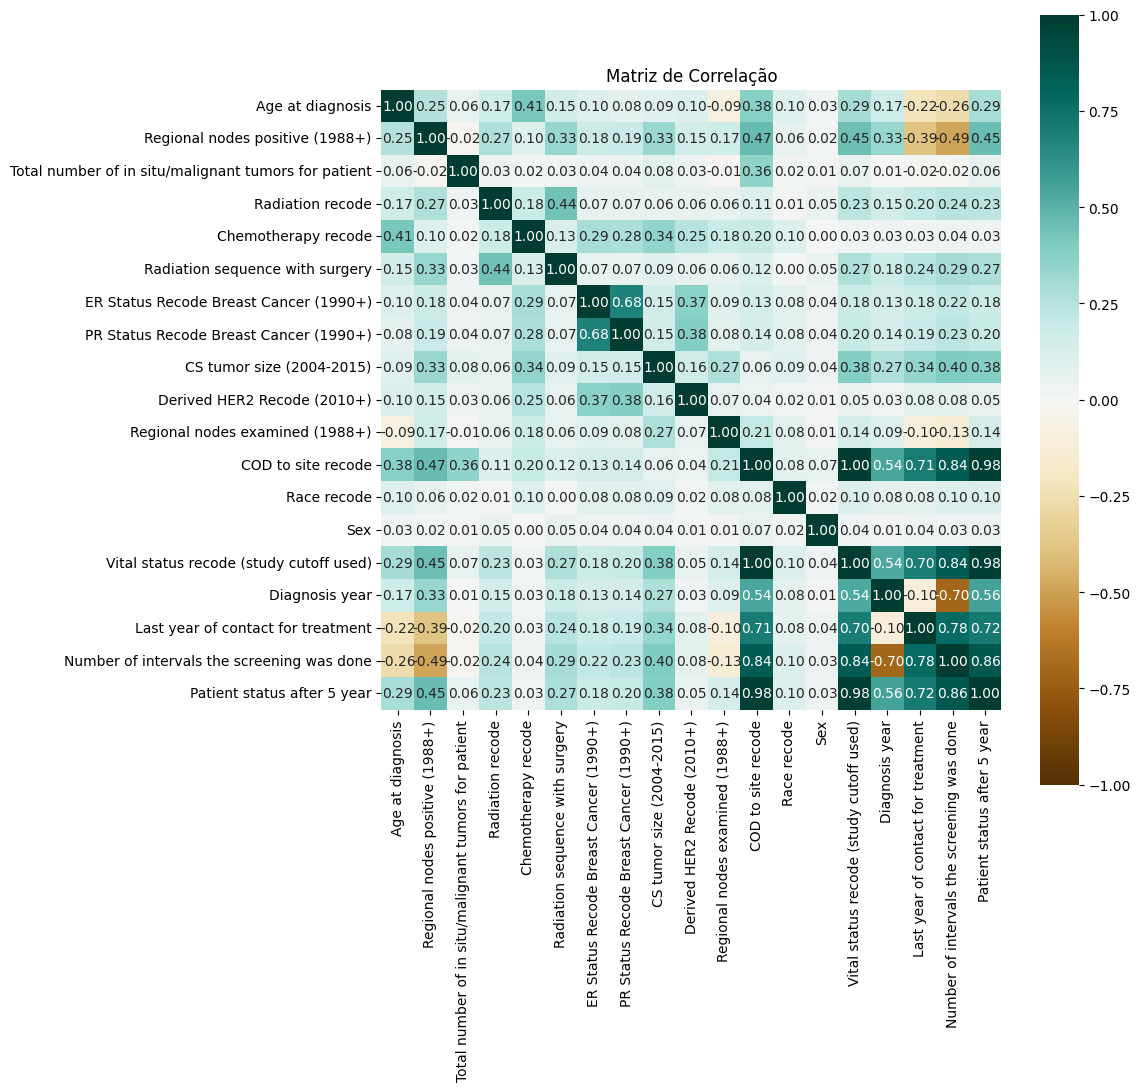

In [109]:
from dython.nominal import associations

ass = associations(df,
                   figsize=(10, 10),
                   cmap="BrBG",
                   title="Matriz de Correlação")

Como podemos ver, as variáveis "COD to site recode", "Vital status recode (study cutoff used)", "Diagnosis year", "Last year of context for treatment" e "Number os intervals the screening was done" são altamente correlacionados com a variável alvo "Patient status after 5 years". Portanto vamos removê-las.

In [110]:
df = df.drop([
    "COD to site recode",
    "Vital status recode (study cutoff used)",
    "Diagnosis year",
    "Last year of contact for treatment",
    "Number of intervals the screening was done"
], axis="columns")

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32922 entries, 0 to 35346
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Age at diagnosis                                      32922 non-null  int64 
 1   Regional nodes positive (1988+)                       32922 non-null  int64 
 2   Total number of in situ/malignant tumors for patient  32922 non-null  int64 
 3   Radiation recode                                      32922 non-null  object
 4   Chemotherapy recode                                   32922 non-null  object
 5   Radiation sequence with surgery                       32922 non-null  object
 6   ER Status Recode Breast Cancer (1990+)                32922 non-null  object
 7   PR Status Recode Breast Cancer (1990+)                32922 non-null  object
 8   CS tumor size (2004-2015)                             32922 non-null  o

Agora, vamos olhar o balanceamento da variável "Patient status after 5 year".

In [111]:
df["Patient status after 5 year"].value_counts(normalize=True)

Patient status after 5 year
Alive    0.695249
Dead     0.304751
Name: proportion, dtype: float64

#### Treinamento de Modelos de ML

Agora, vamos treinar alguns modelos de ML. Vamos começar usando a Regressão Logística para prever o status de vida dos pacientes e usar Random Forests para assegurar a qualidade da Regressão Logística.

In [112]:
from sklearn.svm import SVC
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report
)